<a href="https://colab.research.google.com/github/honeycaron/TIL/blob/main/%EB%94%A5_%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC_3%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec

## 영어 데이터 다운로드 및 전처리

**영어 Word2Vec은 반드시 같이 따라해주세요!**

In [ ]:
import re
from lxml import etree
import urllib.request
import zipfile
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f2b529bcad0>)

In [ ]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [ ]:
for line in result[:3]: # 샘플 3개만 출력
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


## 영어 Word2Vec 훈련시키기

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

여기서 Word2Vec의 하이퍼파라미터값은 다음과 같습니다.  

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.  
window = 컨텍스트 윈도우 크기  
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)  
workers = 학습을 위한 프로세스 수  
sg = 0은 CBOW, 1은 Skip-gram.  

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('guy', 0.8328959345817566), ('woman', 0.8324347734451294), ('lady', 0.7849633693695068), ('boy', 0.7561445236206055), ('girl', 0.7454304695129395), ('gentleman', 0.738538920879364), ('soldier', 0.7335200309753418), ('kid', 0.6728432774543762), ('surgeon', 0.6697134971618652), ('rabbi', 0.6648719906806946)]


In [ ]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('guy', 0.8328959345817566), ('woman', 0.8324347734451294), ('lady', 0.7849633693695068), ('boy', 0.7561445236206055), ('girl', 0.7454304695129395), ('gentleman', 0.738538920879364), ('soldier', 0.7335200309753418), ('kid', 0.6728432774543762), ('surgeon', 0.6697134971618652), ('rabbi', 0.6648719906806946)]


## 한국어 데이터 다운로드 및 전처리

KoNLPy의 OKT 등은 형태소 분석 속도가 너무 느립니다. 그래서 Mecab을 설치하겠습니다.  
단, Mecab은 형태소 분석 속도는 빠르지만 설치하는데 시간이 좀 걸립니다.

In [ ]:
# !pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 69.8MB/s 
     |████████████████████████████████| 3.8MB 52.7MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-09-12 15:11:44--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.g

In [ ]:
import urllib.request
from konlpy.tag import Mecab
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f298cd5add8>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [ ]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [ ]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
# 형태소 분석기 mecab을 사용한 토큰화 작업 (다소 시간 소요)
mecab = Mecab()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 74
리뷰의 평균 길이 : 11.99344973798952


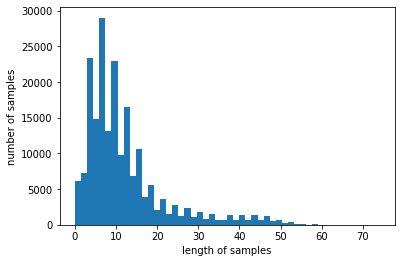

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 한국어 Word2Vec 훈련시키기

nested list를 데이터로 넣어주셔야 합니다.

[['나는', '사과를', 먹는다'], ['이', '영화', '는', '재밌어']]

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(18135, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('드니로', 0.8718392252922058), ('안성기', 0.8683319091796875), ('신들린', 0.8608235120773315), ('한석규', 0.8545922040939331), ('송강호', 0.8537637591362), ('박신양', 0.8519797921180725), ('워싱턴', 0.8472980260848999), ('황정민', 0.8391457200050354), ('설경구', 0.8382948637008667), ('테론', 0.8371904492378235)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8642855286598206), ('최고봉', 0.837036669254303), ('호러', 0.8362128734588623), ('정통', 0.8149666786193848), ('무협', 0.8104077577590942), ('패러디', 0.8028144836425781), ('느와르', 0.8028136491775513), ('괴수', 0.8015121817588806), ('무비', 0.7921817898750305), ('원조', 0.7918606400489807)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
%pwd

'/content/Mecab-ko-for-Google-Colab'

In [ ]:
%cd ..

/content


In [ ]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('kor_w2v') # 모델 저장

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## 영어 Word2Vec 시각화하기

eng_w2v라는 Word2Vec 모델이 이미 존재한다는 가정 하에 아래 커맨드를 수행합니다.

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2021-06-13 03:08:02,456 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py --input eng_w2v --output eng_w2v
2021-06-13 03:08:02,456 - utils_any2vec - INFO - loading projection weights from eng_w2v
2021-06-13 03:08:04,508 - utils_any2vec - INFO - loaded (21613, 100) matrix from eng_w2v
2021-06-13 03:08:06,192 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2021-06-13 03:08:06,192 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2021-06-13 03:08:06,194 - word2vec2tensor - INFO - finished running word2vec2tensor.py


커맨드를 수행하면 경로에 기존에 있던 eng_w2v 외에도 두 개의 파일이 생깁니다.



링크 : https://projector.tensorflow.org/  

이제 해당 링크로 이동!

위에 있는 Choose file 버튼을 누르고 eng_w2v_tensor.tsv 파일을 업로드하고, 아래에 있는 Choose file 버튼을 누르고 eng_w2v_metadata.tsv 파일을 업로드합니다. 두 파일을 업로드하면 임베딩 프로젝터에 학습했던 워드 임베딩 모델이 시각화됩니다.



## 한국어 Word2Vec 시각화하기

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input kor_w2v --output kor_w2v

2020-09-12 15:17:47,602 - word2vec2tensor - INFO - running /usr/local/lib/python3.6/dist-packages/gensim/scripts/word2vec2tensor.py --input kor_w2v --output kor_w2v
2020-09-12 15:17:47,603 - utils_any2vec - INFO - loading projection weights from kor_w2v
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-09-12 15:17:49,156 - utils_any2vec - INFO - loaded (18135, 100) matrix from kor_w2v
2020-09-12 15:17:50,532 - word2vec2tensor - INFO - 2D tensor file saved to kor_w2v_tensor.tsv
2020-09-12 15:17:50,532 - word2vec2tensor - INFO - Tensor metadata file saved to kor_w2v_metadata.tsv
2020-09-12 15:17:50,534 - word2vec2tensor - INFO - finished running word2vec2tensor.py


# FastText

## Word2Vec의 OOV 문제 확인해보기

In [ ]:
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # Word2Vec 모델 로드

In [ ]:
model_result = loaded_model.most_similar("overacting")
print(model_result)

KeyError: ignored

In [ ]:
model_result = loaded_model.most_similar("memory")
print(model_result)

[('perception', 0.6970347166061401), ('consciousness', 0.6933856010437012), ('structure', 0.6695302724838257), ('brain', 0.6685182452201843), ('visual', 0.6679168939590454), ('vision', 0.6670248508453369), ('function', 0.6667823791503906), ('sensory', 0.6571043729782104), ('intuition', 0.6548550128936768), ('logic', 0.6538721323013306)]


In [ ]:
model_result = loaded_model.most_similar("memorry")
print(model_result)

KeyError: ignored

In [ ]:
model_result = loaded_model.most_similar("electrofishing")
print(model_result)

KeyError: ignored

## FastText로 같은 단어에 대해서 테스트해보기

In [ ]:
from gensim.models import FastText
fasttext_model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [ ]:
fasttext_model.most_similar('overacting')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('interacting', 0.8570871353149414),
 ('subtracting', 0.8423227071762085),
 ('distracting', 0.832316517829895),
 ('manipulating', 0.8289050459861755),
 ('extracting', 0.8223406672477722),
 ('acting', 0.8174149990081787),
 ('contracting', 0.8156751394271851),
 ('impacting', 0.8090909719467163),
 ('behaving', 0.7983506321907043),
 ('engaging', 0.7738267183303833)]

In [ ]:
fasttext_model.most_similar('memorry')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('emory', 0.9020308256149292),
 ('memo', 0.8235325813293457),
 ('compulsory', 0.760106086730957),
 ('memorial', 0.741071879863739),
 ('sensory', 0.7296149730682373),
 ('brain', 0.7269755601882935),
 ('memories', 0.7233008146286011),
 ('memoir', 0.7204288244247437),
 ('brainstorm', 0.7182163000106812),
 ('receptacle', 0.7073555588722229)]

In [ ]:
fasttext_model.most_similar("electrofishing")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('electrolux', 0.8136441707611084),
 ('electro', 0.8023115396499634),
 ('electrolyte', 0.8005442023277283),
 ('electric', 0.7811466455459595),
 ('electrogram', 0.7717689275741577),
 ('electroencephalogram', 0.7666690349578857),
 ('electrochemical', 0.762368381023407),
 ('electroshock', 0.7623356580734253),
 ('gastric', 0.7609995007514954),
 ('electron', 0.7513681650161743)]

# GloVe

In [ ]:
!pip install glove_python

     |████████████████████████████████| 266kB 5.4MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=702578 sha256=3df18f0e3ea348da9d2e84668556f06cbe41af4ec35fe3969a1123d612cf5db5
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [ ]:
from glove import Corpus, Glove

corpus = Corpus() 
corpus.fit(result, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [ ]:
model_result1 = glove.most_similar("man")
print(model_result1)

[('woman', 0.9603297123895206), ('guy', 0.8867963909004861), ('girl', 0.8511922202894275), ('young', 0.8456941751677143)]


In [ ]:
model_result2=glove.most_similar("boy")
print(model_result2)

[('girl', 0.9426999459279812), ('kid', 0.8349080410569295), ('woman', 0.828215556536367), ('man', 0.8206563360895087)]


In [ ]:
model_result3=glove.most_similar("university")
print(model_result3)

[('harvard', 0.8887281164657229), ('mit', 0.8649384442738351), ('stanford', 0.8457795420552119), ('cambridge', 0.844389540259986)]


In [ ]:
model_result4=glove.most_similar("water")
print(model_result4)

[('clean', 0.8505536147221827), ('air', 0.8425028333290756), ('fresh', 0.8293485963674472), ('electricity', 0.8214423416327359)]


In [ ]:
model_result5=glove.most_similar("physics")
print(model_result5)

[('chemistry', 0.8883021403505192), ('economics', 0.8680346746346678), ('biology', 0.8517210036294963), ('mathematics', 0.8511010898005069)]


In [ ]:
model_result6=glove.most_similar("muscle")
print(model_result6)

[('tissue', 0.8329491957155829), ('nerve', 0.8254139580138623), ('skeletal', 0.7680005456222042), ('stem', 0.7508701137127646)]


In [ ]:
model_result7=glove.most_similar("clean")
print(model_result7)

[('fresh', 0.8678060450664167), ('water', 0.8505536147221828), ('drinking', 0.7986828483716157), ('wind', 0.793636790738521)]


# Embedding layer Vs. Pretrained Embedding

## Embedding layer

In [ ]:
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Embedding

In [ ]:
# 임의의 문서 3개 생성
sample_text_1="bitty bought a bit of butter"
sample_text_2="but the bit of butter was a bit bitter"
sample_text_3="so she bought some better butter to make the bitter butter better"

corp = [sample_text_1, sample_text_2, sample_text_3]
no_docs=len(corp)

In [ ]:
# 단어장의 크기를 50으로 하고 단어에 정수 부여
vocab_size = 50 
encod_corp=[]
for i,doc in enumerate(corp):
    encod_corp.append(one_hot(doc,50))
    print("The encoding for document",i+1," is : ",one_hot(doc,50))

The encoding for document 1  is :  [35, 49, 14, 39, 43, 16]
The encoding for document 2  is :  [44, 26, 39, 43, 16, 45, 14, 39, 38]
The encoding for document 3  is :  [33, 42, 49, 46, 30, 16, 46, 46, 26, 38, 16, 30]


In [ ]:
# 임베딩 레이어 생성
model = Sequential()
model.add(Embedding(vocab_size, 128))

In [ ]:
# 룩업 테이블 저장
embeddings = model.layers[0].get_weights()[0]

In [ ]:
# 룩업 테이블 크기 확인
print(embeddings.shape)

(50, 128)


In [ ]:
# 34번째 단어 임베딩 값 확인
embeddings[34]

array([-0.01106865,  0.0394384 , -0.0478355 ,  0.02675352,  0.04862538,
        0.03961532,  0.02246172, -0.01345694, -0.02711718, -0.02639705,
        0.00436708,  0.01028376,  0.01379221, -0.02657043, -0.02174001,
        0.01797474, -0.0052099 ,  0.02376706, -0.0226912 , -0.03302009,
       -0.03598273,  0.04697586,  0.04923508, -0.03926278,  0.0133314 ,
       -0.01996141,  0.03338749,  0.00021373,  0.02966574, -0.02901641,
        0.03277599, -0.04573483,  0.03233311, -0.01095687,  0.00595096,
        0.00175988, -0.00847365,  0.01309201, -0.01706252, -0.01703366,
       -0.01349332,  0.02245844,  0.0243522 ,  0.03013821,  0.01006918,
        0.04626724,  0.04557112,  0.01195331,  0.02492466,  0.03209781,
       -0.0014979 ,  0.00148914,  0.03699131,  0.02931536, -0.00652859,
       -0.01847283,  0.03345947,  0.03421794,  0.02096744,  0.02205279,
        0.03600856, -0.01789178,  0.0378    ,  0.01164681, -0.00064325,
       -0.03809013,  0.00919255, -0.02953138, -0.03147631, -0.03

In [ ]:
# 첫번째 문서 임베딩화
embeddings[encod_corp[0]].shape

(6, 128)

In [ ]:
# 두번째 문서 임베딩화
embeddings[encod_corp[1]].shape

(9, 128)

In [ ]:
# 세번째 문서 임베딩화
embeddings[encod_corp[2]].shape

(12, 128)

## 감성 분류하기(Embedding layer)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [ ]:
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

16


In [ ]:
X_encoded = t.texts_to_sequences(sentences)
print(X_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [ ]:
max_len = max(len(l) for l in X_encoded)
print(max_len)

4


In [ ]:
X_train=pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train=np.array(y_train)
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(vocab_size, 4, input_length=max_len)) # 모든 임베딩 벡터는 4차원.
model.add(Flatten()) # Dense의 입력으로 넣기위함.
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 2s - loss: 0.6918 - acc: 0.4286
Epoch 2/100
1/1 - 0s - loss: 0.6901 - acc: 0.4286
Epoch 3/100
1/1 - 0s - loss: 0.6883 - acc: 0.4286
Epoch 4/100
1/1 - 0s - loss: 0.6865 - acc: 0.7143
Epoch 5/100
1/1 - 0s - loss: 0.6848 - acc: 0.7143
Epoch 6/100
1/1 - 0s - loss: 0.6830 - acc: 0.7143
Epoch 7/100
1/1 - 0s - loss: 0.6812 - acc: 0.7143
Epoch 8/100
1/1 - 0s - loss: 0.6795 - acc: 0.7143
Epoch 9/100
1/1 - 0s - loss: 0.6777 - acc: 0.7143
Epoch 10/100
1/1 - 0s - loss: 0.6760 - acc: 0.7143
Epoch 11/100
1/1 - 0s - loss: 0.6742 - acc: 0.7143
Epoch 12/100
1/1 - 0s - loss: 0.6724 - acc: 0.8571
Epoch 13/100
1/1 - 0s - loss: 0.6707 - acc: 0.8571
Epoch 14/100
1/1 - 0s - loss: 0.6689 - acc: 1.0000
Epoch 15/100
1/1 - 0s - loss: 0.6672 - acc: 1.0000
Epoch 16/100
1/1 - 0s - loss: 0.6654 - acc: 1.0000
Epoch 17/100
1/1 - 0s - loss: 0.6636 - acc: 1.0000
Epoch 18/100
1/1 - 0s - loss: 0.6618 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.6601 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.6583 - a

## 감성 분류하기(Pre-trained Embedding)

In [ ]:
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [ ]:
import numpy as np
import gensim

In [ ]:
# 현재 위치에 구글의 사전 훈련된 Word2Vec을 다운로드
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-06-19 02:06:37--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.226.251
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.226.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  31.3MB/s    in 54s     

2021-06-19 02:07:31 (29.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
# 구글의 사전 훈련된 Word2vec 모델을 로드합니다.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)  

In [ ]:
print(word2vec_model.vectors.shape) # 모델의 크기 확인

(3000000, 300)


In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
# 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)

(16, 300)

In [ ]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [ ]:
for word, i in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = get_vector(word) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp # 해당 단어 위치의 행에 벡터의 값을 저장한다.

In [ ]:
print(word2vec_model['nice'])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [ ]:
print('단어 nice의 정수 인덱스 :', t.word_index['nice'])

단어 nice의 정수 인덱스 : 1


In [ ]:
print(embedding_matrix[1])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.6661 - acc: 0.8571
Epoch 2/100
1/1 - 0s - loss: 0.6472 - acc: 0.8571
Epoch 3/100
1/1 - 0s - loss: 0.6288 - acc: 0.8571
Epoch 4/100
1/1 - 0s - loss: 0.6110 - acc: 0.8571
Epoch 5/100
1/1 - 0s - loss: 0.5937 - acc: 1.0000
Epoch 6/100
1/1 - 0s - loss: 0.5770 - acc: 1.0000
Epoch 7/100
1/1 - 0s - loss: 0.5609 - acc: 1.0000
Epoch 8/100
1/1 - 0s - loss: 0.5454 - acc: 1.0000
Epoch 9/100
1/1 - 0s - loss: 0.5304 - acc: 1.0000
Epoch 10/100
1/1 - 0s - loss: 0.5159 - acc: 1.0000
Epoch 11/100
1/1 - 0s - loss: 0.5020 - acc: 1.0000
Epoch 12/100
1/1 - 0s - loss: 0.4886 - acc: 1.0000
Epoch 13/100
1/1 - 0s - loss: 0.4757 - acc: 1.0000
Epoch 14/100
1/1 - 0s - loss: 0.4633 - acc: 1.0000
Epoch 15/100
1/1 - 0s - loss: 0.4513 - acc: 1.0000
Epoch 16/100
1/1 - 0s - loss: 0.4398 - acc: 1.0000
Epoch 17/100
1/1 - 0s - loss: 0.4287 - acc: 1.0000
Epoch 18/100
1/1 - 0s - loss: 0.4180 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.4077 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.3978 - a

# Tensorflow Hub로부터 Pre-trained Embedding 사용하기

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [ ]:
(train_data, validation_data, test_data), info = tfds.load('imdb_reviews', split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP6E2GM/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP6E2GM/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP6E2GM/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [ ]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
40/40 [==============================] - 2s 52ms/step - loss: 0.8557 - accuracy: 0.5563 - val_loss: 0.6712 - val_accuracy: 0.5908
Epoch 2/20
40/40 [==============================] - 2s 48ms/step - loss: 0.6371 - accuracy: 0.6423 - val_loss: 0.6208 - val_accuracy: 0.6520
Epoch 3/20
40/40 [==============================] - 2s 47ms/step - loss: 0.5950 - accuracy: 0.6921 - val_loss: 0.5817 - val_accuracy: 0.6992
Epoch 4/20
40/40 [==============================] - 2s 48ms/step - loss: 0.5556 - accuracy: 0.7315 - val_loss: 0.5439 - val_accuracy: 0.7240
Epoch 5/20
40/40 [==============================] - 2s 46ms/step - loss: 0.5153 - accuracy: 0.7624 - val_loss: 0.5048 - val_accuracy: 0.7648
Epoch 6/20
40/40 [==============================] - 2s 48ms/step - loss: 0.4706 - accuracy: 0.7907 - val_loss: 0.4626 - val_accuracy: 0.7908
Epoch 7/20
40/40 [==============================] - 2s 48ms/step - loss: 0.4260 - accuracy: 0.8173 - val_loss: 0.4242 - val_accuracy: 0.8188
Epoch 8/20
40

In [ ]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

5/5 - 0s - loss: 0.2793 - accuracy: 0.8816
loss: 0.279
accuracy: 0.882


# SGNS 구현하기

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [ ]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [ ]:
news_df.isnull().values.any()

False

In [ ]:
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [ ]:
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [ ]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# 단어가 1개 이하인 경우 중심 단어, 주변 단어가 존재하지 않으므로 불가.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]

In [ ]:
print(drop_train)

[44, 260, 353, 1651, 1839, 2321, 2336, 2371, 2862, 2963, 3290, 3387, 3395, 3396, 3421, 3563, 3591, 3713, 3874, 3897, 4180, 4524, 4587, 4617, 4947, 4970, 5129, 5525, 6015, 6227, 6652, 6723, 6883, 7080, 7956, 8000, 8156, 8212, 8283, 8588, 8867, 8903, 9045, 9555, 9696, 10439, 10447, 10564, 10707, 10730, 10750, 10838, 10896, 10908, 10967]


In [ ]:
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)

In [ ]:
print(len(tokenized_doc))

10940


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [ ]:
print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [ ]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


토큰화, 정제, 정규화, 불용어 제거, 정수 인코딩까지 일반적인 전처리 과정을 거쳤습니다. 네거티브 샘플링을 통한 데이터셋을 구성할 차례입니다. 이를 위해서는 네거티브 샘플링을 위해서 케라스에서 제공하는 전처리 도구인 skipgrams를 사용합니다. 어떤 전처리가 수행되는지 그 결과를 확인하기 위해서 (꽤 시간이 소요되는 작업이므로) 상위 10개의 뉴스그룹 샘플에 대해서만 수행해봅시다.

In [ ]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

결과를 확인합니다. 10개의 뉴스그룹 샘플에 대해서 모두 수행되었지만, 첫번째 뉴스그룹 샘플에 대해서만 확인해보겠습니다.



In [ ]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(europe (1095), industries (4874)) -> 0
(media (702), creators (28906)) -> 0
(degree (1530), backlighted (28592)) -> 0
(clearly (661), israeli (442)) -> 1
(austria (4866), dishonourable (54277)) -> 0
(think (6), reports (755)) -> 1
(ignore (1979), seem (207)) -> 1
(statement (474), world (70)) -> 1
(reports (755), daily (1920)) -> 1
(clearly (661), reason (149)) -> 1


윈도우 크기 내에서 중심 단어, 주변 단어의 관계를 가지는 경우에는 1의 레이블을 갖도록 하고, 그렇지 않은 경우는 0의 레이블을 가지도록 하여 데이터셋을 구성합니다. 이 과정은 각각의 뉴스그룹 샘플에 대해서 동일한 프로세스로 수행됩니다.

In [ ]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [ ]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


이 작업을 모든 뉴스그룹 샘플에 대해서 수행합니다.

In [ ]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
embed_size = 100

In [ ]:
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

In [ ]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       6427700     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       6427700     input_2[0][0]                    
_______________________________________________________________________________________

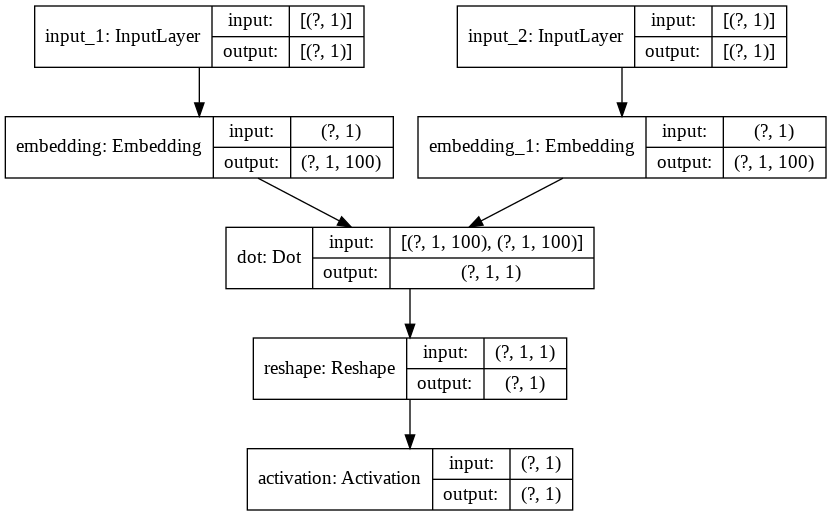

In [ ]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 4629.110517144203
Epoch : 2 Loss : 3670.3784894645214
Epoch : 3 Loss : 3510.197998929769
Epoch : 4 Loss : 3308.5524085350335
Epoch : 5 Loss : 3082.984006331302


In [ ]:
import gensim

In [ ]:
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
w2v.most_similar(positive=['soldiers'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wounded', 0.8630685806274414),
 ('massacred', 0.8264391422271729),
 ('massacre', 0.822135329246521),
 ('shelling', 0.8160871267318726),
 ('slaughtered', 0.813990592956543),
 ('gazans', 0.8133612871170044),
 ('occupied', 0.8131306171417236),
 ('massacres', 0.8092026710510254),
 ('elderly', 0.8050550222396851),
 ('moslem', 0.8037423491477966)]

In [ ]:
w2v.most_similar(positive=['doctor'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('clinic', 0.582487940788269),
 ('infection', 0.5769582390785217),
 ('pain', 0.5762976408004761),
 ('treatment', 0.563055694103241),
 ('chronic', 0.5581271648406982),
 ('treated', 0.5178740620613098),
 ('quack', 0.5115471482276917),
 ('stopping', 0.5095911026000977),
 ('swiss', 0.5059969425201416),
 ('diagnosis', 0.49491220712661743)]

In [ ]:
w2v.most_similar(positive=['police'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('raids', 0.5848600268363953),
 ('violent', 0.566329836845398),
 ('officials', 0.5605665445327759),
 ('declined', 0.556200385093689),
 ('robbery', 0.5526008009910583),
 ('pretext', 0.5522351264953613),
 ('ghetto', 0.5508134365081787),
 ('voted', 0.5499347448348999),
 ('archery', 0.5481936931610107),
 ('bound', 0.5419867038726807)]

In [ ]:
w2v.most_similar(positive=['knife'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('handgun', 0.7971947193145752),
 ('azerbaijani', 0.7935985326766968),
 ('gazans', 0.7899342775344849),
 ('elderly', 0.7781503200531006),
 ('murders', 0.76943439245224),
 ('struggling', 0.7655448913574219),
 ('kurd', 0.759674072265625),
 ('azerbaijanis', 0.7571895122528076),
 ('massacred', 0.7547619342803955),
 ('massacre', 0.7517086267471313)]

In [ ]:
w2v.most_similar(positive=['engine'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('valve', 0.64695143699646),
 ('inline', 0.6066191792488098),
 ('compartment', 0.5927720069885254),
 ('bike', 0.5814577341079712),
 ('mounted', 0.5766295194625854),
 ('brake', 0.5744865536689758),
 ('heater', 0.5740223526954651),
 ('tires', 0.5730470418930054),
 ('trunk', 0.5718965530395508),
 ('drain', 0.5700671672821045)]

# SGNS 구현 다른 예제 (참고만 하세요)

In [ ]:
import os
from collections import Counter
from time import time

import numpy as np
import pandas as pd
from keras.layers import Dense, Dot, Embedding, Input, Reshape
from keras.models import Model
from keras.preprocessing.sequence import skipgrams
from nltk.corpus import stopwords

np.random.seed(777)
os.environ["CUDA_VISIBLE_DEVICES"] = '-1'

Using TensorFlow backend.


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/eds-uga/csci1360e-su18/master/assignments/A9/abcnews-date-text.csv", filename="abcnews-date-text.csv")

('abcnews-date-text.csv', <http.client.HTTPMessage at 0x7fe56b5c9f98>)

In [ ]:
corpus = pd.read_csv("abcnews-date-text.csv").iloc[:,1] 
corpus.head(10)

In [ ]:
# 소문자로 변경
corpus = corpus.str.lower()    
# 숫자/알파벳/공백 을 제외하고 전부 제거 (with pandas.core.strings.StringMethods)
corpus = corpus.str.replace('[^a-z0-9]+', ' ', regex=True)
corpus.head(10)

In [ ]:
corpus_list = corpus.values.tolist()
len(corpus_list)

In [ ]:
corpus_list[0:5]

In [ ]:
# corpus에 있는 모든 line에서 word를 추출해서 하나의 list에 모두 집어넣습니다.
words = np.concatenate(np.core.defchararray.split(corpus_list)).tolist()
print(words[0:100])

In [ ]:
# 너무 자주 출현하는 word들은 word vector 구성에 방해가 됩니다. 이런 불용어들을 제거해 줍니다. 
stopWords = set(stopwords.words('english'))
print(stopWords)

In [ ]:
# 단어의 등장 빈도수를 카운트해주는 패키지
counter = Counter(words)
len(counter)

In [ ]:
# 등장 빈도 상위 100개
counter.most_common(100)

In [ ]:
# 불룡어 제거
words = [word for word in words if word not in stopWords]

In [ ]:
print(counter.most_common(100))

In [ ]:
# 상위 80%만 남긴다. 그리고 UNK 토큰을 Vocabulary에 추가
top_n_ratio=0.8

counter = Counter(dict(counter.most_common(int(top_n_ratio * len(counter)))))
vocab = list(counter) + ['UNK']
vocab[-10:]

In [ ]:
vocab_size = len(vocab)
vocab_size

In [ ]:
word2index = {word:index for index, word in enumerate(vocab)}
index2word = {index:word for word, index in word2index.items()}

In [ ]:
word2index['iraq']

In [ ]:
index2word[96]

In [ ]:
# 정수 인코딩
indexed_corpus_list = []
for doc in corpus_list:
    indexed_corpus_list.append([word2index[word] if word in word2index else word2index['UNK'] for word in doc.split()])

In [ ]:
corpus_list[0]

In [ ]:
indexed_corpus_list[0]

In [ ]:
word2index['aba']

In [ ]:
word2index['licence']


In [ ]:
# 네거티브 샘플링이 섞인 데이터셋 생성
def generating_wordpairs(indexed_corpus, vocab_size, window_size=4):
    X = []
    Y = []
    for row in indexed_corpus:
        x, y = skipgrams(sequence=row, vocabulary_size=vocab_size, window_size=window_size,
                        negative_samples=1.0, shuffle=True, categorical=False, sampling_table=None, seed=None)
        X = X + list(x)
        Y = Y + list(y)
    return X, Y

In [ ]:
X, Y = generating_wordpairs(indexed_corpus_list[0:100], vocab_size, window_size=4)

In [ ]:
print(X[0])

[6092, 55727]


In [ ]:
print(Y[0])

0


In [ ]:
#embedding_dim=300
embedding_dim=30

input_target = Input((1,))
input_context = Input((1,))

embedding_layer = Embedding(vocab_size, embedding_dim, input_length=1)

target_embedding = embedding_layer(input_target)
target_embedding = Reshape((embedding_dim, 1))(target_embedding)
context_embedding = embedding_layer(input_context)
context_embedding = Reshape((embedding_dim, 1))(context_embedding)

hidden_layer = Dot(axes=1)([target_embedding, context_embedding])
hidden_layer = Reshape((1,))(hidden_layer)

output = Dense(16, activation='sigmoid')(hidden_layer)
output = Dense(1, activation='sigmoid')(output)

model = Model(inputs=[input_target, input_context], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='sgd')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 30)        2321340     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 30, 1)        0           embedding_2[0][0]          

In [ ]:
epochs = 100000
batch_size = 512

for i in range(epochs):
    idx_batch = np.random.choice(len(indexed_corpus_list), batch_size)
    X, Y = generating_wordpairs(np.array(indexed_corpus_list)[idx_batch].tolist(), vocab_size)

    word_target, word_context = zip(*X)
    word_target = np.array(word_target, dtype=np.int32)
    word_context = np.array(word_context, dtype=np.int32)

    target = np.zeros((1,))
    context = np.zeros((1,))
    label = np.zeros((1,))
    idx = np.random.randint(0, len(Y)-1)
    target[0,] = word_target[idx]
    context[0,] = word_context[idx]
    label[0,] = Y[idx]
    loss = model.train_on_batch([target, context], label)
    if i % 10 == 0:
        print("Iteration {}, loss={}".format(i, loss))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Iteration 0, loss=0.418701708316803
Iteration 10, loss=1.020002007484436
Iteration 20, loss=0.4909874498844147
Iteration 30, loss=0.9454270601272583
Iteration 40, loss=0.4941861033439636
Iteration 50, loss=0.5181975364685059
Iteration 60, loss=0.5186092853546143
Iteration 70, loss=0.8760280013084412
Iteration 80, loss=0.5335646271705627
Iteration 90, loss=0.9153674840927124
Iteration 100, loss=0.5517467856407166
Iteration 110, loss=0.9519153237342834
Iteration 120, loss=0.5482457876205444
Iteration 130, loss=0.5639049410820007
Iteration 140, loss=0.793644905090332
Iteration 150, loss=0.7296739816665649
Iteration 160, loss=0.6996212601661682
Iteration 170, loss=0.6632164716720581
Iteration 180, loss=0.7446346879005432
Iteration 190, loss=0.6632117629051208
Iteration 200, loss=0.7419507503509521
Iteration 210, loss=0.7237974405288696


KeyboardInterrupt: ignored

In [ ]:
word2vec_file_path = 'word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in word2index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


array([-0.02655335,  0.01613258, -0.01884152,  0.00225597,  0.03588798,
        0.01791611, -0.04908825,  0.02676917, -0.00985587, -0.03896325,
        0.03224862, -0.0489888 ,  0.02925624, -0.04400914,  0.02372762,
        0.04993862, -0.04695542, -0.02855517, -0.02023038,  0.00429451,
       -0.04318174, -0.02264958,  0.04702992, -0.04923805, -0.03045248,
       -0.03173252,  0.02526869, -0.00751292, -0.01163135, -0.00431548],
      dtype=float32)

In [ ]:
word_vectors.similar_by_word("cat")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cayleb', 0.676974892616272),
 ('omeros', 0.6681385636329651),
 ('certifications', 0.6634451150894165),
 ('smeaton', 0.6378586888313293),
 ('brougham', 0.6364120841026306),
 ('crypt', 0.6362036466598511),
 ('seaports', 0.629311740398407),
 ('gasgoyne', 0.6285969018936157),
 ('transformative', 0.6258813142776489),
 ('hazem', 0.6255269050598145)]